![](https://ucb.catolica.edu.br/hubfs/SITE/logo__catolica--footer.svg)

## Novas Tecnologias

Professor: Remis Balaniuk, 2024

# Tranformação de Dados

Nesse carderno iremos aplicar os conceitos apresentados anteriormente relativos à transformação de dados de uma base bruta carrega para fins de análise.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

In [12]:
data = pd.read_csv("adventureWorks.csv")

In [13]:
data.head()

,SalesPersonID,JobTitle,Gender,TerritoryID,NomeTerritorioVenda,CountryRegionCode,SalesQuota,Bonus,CommissionPct,SalesYTD,SalesLastYear,OrderDate,SubTotal,TotalDue,CustomerID,SalesOrderID,ShipDate,Freight
0,279.0,Sales Representative,M,5,Souheast,US,300000.0,6700.0,0.010,2.315186e+06,1.849641e+06,2011-05-31 00:00:00.000,20565.6206,23153.2339,29825.0,43659.0,2011-06-07 00:00:00.000,616.0984
1,279.0,Sales Representative,M,5,Southeast,US,300000.0,6700.0,0.010,2.315186e+06,1.849641e+06,2011-05-31 00:00:00.000,1294.2529,1457.3288,29672.0,43660.0,2011-06-07 00:00:00.000,38.8276
2,282.0,Sales Representative,M,6,Canada,CA,250000.0,5000.0,0.015,2.604541e+06,2.038235e+06,2011-05-31 00:00:00.000,32726.4786,36865.8012,29734.0,43661.0,2011-06-07 00:00:00.000,985.5530
3,282.0,Sales Representative,M,6,Canada,CA,250000.0,5000.0,0.015,2.604541e+06,2.038235e+06,2011-05-31 00:00:00.000,28832.5289,32474.9324,29994.0,43662.0,2011-06-07 00:00:00.000,867.2389
4,276.0,Sales Representative,F,4,Southwest,US,250000.0,2000.0,0.015,4.251369e+06,1.439156e+06,2011-05-31 00:00:00.000,419.4589,472.3108,29565.0,43663.0,2011-06-07 00:00:00.000,12.5838


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6861 entries, 0 to 6860
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SalesPersonID        1892 non-null   float64
 1   JobTitle             1892 non-null   object 
 2   Gender               1892 non-null   object 
 3   TerritoryID          6861 non-null   int64  
 4   NomeTerritorioVenda  6861 non-null   object 
 5   CountryRegionCode    6861 non-null   object 
 6   SalesQuota           1853 non-null   float64
 7   Bonus                1892 non-null   float64
 8   CommissionPct        1892 non-null   float64
 9   SalesYTD             1892 non-null   float64
 10  SalesLastYear        1892 non-null   float64
 11  OrderDate            6861 non-null   object 
 12  SubTotal             6860 non-null   float64
 13  TotalDue             6860 non-null   float64
 14  CustomerID           6860 non-null   float64
 15  SalesOrderID         6860 non-null   f

# Dados faltantes

Como já discutido no caderno anterior, essa consulta, que procurou mostrar detalhes das compras com ou sem vendedor associado, trouxe um grande número de valores faltantes. Já vimos uma forma de estimar essa falta, mas existem outras possibilidades.

In [15]:
# conta missing values por coluna
data.isnull().sum()

SalesPersonID          4969
JobTitle               4969
Gender                 4969
TerritoryID               0
NomeTerritorioVenda       0
CountryRegionCode         0
SalesQuota             5008
Bonus                  4969
CommissionPct          4969
SalesYTD               4969
SalesLastYear          4969
OrderDate                 0
SubTotal                  1
TotalDue                  1
CustomerID                1
SalesOrderID              1
ShipDate                  1
Freight                   1
dtype: int64

Note que todas as colunas com dados dos vendedores possuem alta proporção de dados faltantes.

In [16]:
# conta missing values do dataframe todo
data.isnull().sum().sum(0)

39797

In [17]:
# conta linhas com pelo menos uma coluna faltante
data.isnull().any(axis=1).sum()

5008

In [18]:
# mostra só linhas contendo missing values
data[data.isnull().any(axis=1)]

,SalesPersonID,JobTitle,Gender,TerritoryID,NomeTerritorioVenda,CountryRegionCode,SalesQuota,Bonus,CommissionPct,SalesYTD,SalesLastYear,OrderDate,SubTotal,TotalDue,CustomerID,SalesOrderID,ShipDate,Freight
38,NaN,NaN,NaN,6,Canada,CA,NaN,NaN,NaN,NaN,NaN,2011-05-31 00:00:00.000,3578.2700,3953.9884,21768.0,43697.0,2011-06-07 00:00:00.000,89.4568
39,NaN,NaN,NaN,7,France,FR,NaN,NaN,NaN,NaN,NaN,2011-05-31 00:00:00.000,3399.9900,3756.9890,28389.0,43698.0,2011-06-07 00:00:00.000,84.9998
40,NaN,NaN,NaN,1,Northwest,US,NaN,NaN,NaN,NaN,NaN,2011-05-31 00:00:00.000,3399.9900,3756.9890,25863.0,43699.0,2011-06-07 00:00:00.000,84.9998
41,NaN,NaN,NaN,4,Southwest,US,NaN,NaN,NaN,NaN,NaN,2011-05-31 00:00:00.000,699.0982,772.5036,14501.0,43700.0,2011-06-07 00:00:00.000,17.4775
42,NaN,NaN,NaN,9,Australia,AU,NaN,NaN,NaN,NaN,NaN,2011-05-31 00:00:00.000,3399.9900,3756.9890,11003.0,43701.0,2011-06-07 00:00:00.000,84.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6856,NaN,NaN,NaN,9,Australia,AU,NaN,NaN,NaN,NaN,NaN,2013-04-17 00:00:00.000,2049.0982,2264.2536,15215.0,50515.0,2013-04-24 00:00:00.000,51.2275
6857,NaN,NaN,NaN,9,Australia,AU,NaN,NaN,NaN,NaN,NaN,2013-04-17 00:00:00.000,2049.0982,2264.2536,15646.0,50516.0,2013-04-24 00:00:00.000,51.2275
6858,NaN,NaN,NaN,4,Southwest,US,NaN,NaN,NaN,NaN,NaN,2013-04-17 00:00:00.000,2071.4196,2288.9187,27423.0,50517.0,2013-04-24 00:00:00.000,51.7855
6859,NaN,NaN,NaN,10,United Kingdom,GB,NaN,NaN,NaN,NaN,NaN,2013-04-18 00:00:00.000,2181.5625,2410.6266,18136.0,50518.0,2013-04-25 00:00:00.000,54.5391


In [19]:
# mostra só linhas sem missing values
data[np.logical_not(data.isnull().any(axis=1))]

,SalesPersonID,JobTitle,Gender,TerritoryID,NomeTerritorioVenda,CountryRegionCode,SalesQuota,Bonus,CommissionPct,SalesYTD,SalesLastYear,OrderDate,SubTotal,TotalDue,CustomerID,SalesOrderID,ShipDate,Freight
0,279.0,Sales Representative,M,5,Souheast,US,300000.0,6700.0,0.010,2.315186e+06,1.849641e+06,2011-05-31 00:00:00.000,20565.6206,23153.2339,29825.0,43659.0,2011-06-07 00:00:00.000,616.0984
1,279.0,Sales Representative,M,5,Southeast,US,300000.0,6700.0,0.010,2.315186e+06,1.849641e+06,2011-05-31 00:00:00.000,1294.2529,1457.3288,29672.0,43660.0,2011-06-07 00:00:00.000,38.8276
2,282.0,Sales Representative,M,6,Canada,CA,250000.0,5000.0,0.015,2.604541e+06,2.038235e+06,2011-05-31 00:00:00.000,32726.4786,36865.8012,29734.0,43661.0,2011-06-07 00:00:00.000,985.5530
3,282.0,Sales Representative,M,6,Canada,CA,250000.0,5000.0,0.015,2.604541e+06,2.038235e+06,2011-05-31 00:00:00.000,28832.5289,32474.9324,29994.0,43662.0,2011-06-07 00:00:00.000,867.2389
4,276.0,Sales Representative,F,4,Southwest,US,250000.0,2000.0,0.015,4.251369e+06,1.439156e+06,2011-05-31 00:00:00.000,419.4589,472.3108,29565.0,43663.0,2011-06-07 00:00:00.000,12.5838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6659,290.0,Sales Representative,M,7,France,FR,250000.0,985.0,0.016,3.121616e+06,2.396540e+06,2013-03-30 00:00:00.000,202.3320,228.5340,29989.0,50318.0,2013-04-06 00:00:00.000,6.2386
6660,276.0,Sales Representative,F,3,Central,US,250000.0,2000.0,0.015,4.251369e+06,1.439156e+06,2013-03-30 00:00:00.000,780.7197,881.8229,29511.0,50319.0,2013-04-06 00:00:00.000,24.0722
6661,275.0,Sales Representative,M,3,Central,US,300000.0,4100.0,0.012,3.763178e+06,1.750406e+06,2013-03-30 00:00:00.000,600.2625,675.8956,29819.0,50320.0,2013-04-06 00:00:00.000,18.0079
6662,283.0,Sales Representative,M,1,Northwest,US,250000.0,3500.0,0.012,1.573013e+06,1.371635e+06,2013-03-30 00:00:00.000,44161.7113,49740.9593,29885.0,50321.0,2013-04-06 00:00:00.000,1328.3924


In [20]:
#cria uma cópia do dataframe só com linhas sem dados faltantes
dataLimpa = data.dropna()

In [21]:
print("antes:",len(data),"depois:",len(dataLimpa))

antes: 6861 depois: 1853


In [22]:
data.describe()

,SalesPersonID,TerritoryID,SalesQuota,Bonus,CommissionPct,SalesYTD,SalesLastYear,SubTotal,TotalDue,CustomerID,SalesOrderID,Freight
count,1892.000000,6861.000000,1853.000000,1892.000000,1892.000000,1.892000e+03,1.892000e+03,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000
mean,279.574524,6.028276,264813.815434,3646.791755,0.013098,2.891851e+06,1.718625e+06,7910.117948,8879.492458,21906.318950,47088.500000,230.803475
std,4.295072,2.959752,22836.880084,1837.954709,0.003571,1.005084e+06,4.327649e+05,16307.008265,18392.529731,6854.007444,1980.455756,497.565829
min,274.000000,1.000000,250000.000000,0.000000,0.000000,5.199059e+05,0.000000e+00,5.700000,6.348400,11000.000000,43659.000000,0.154400
25%,276.000000,4.000000,250000.000000,2500.000000,0.010000,2.315186e+06,1.620277e+06,2049.098200,2264.253600,15034.500000,45373.750000,51.227500
50%,279.000000,6.000000,250000.000000,3550.000000,0.012000,3.121616e+06,1.750406e+06,2443.350000,2699.901800,21983.500000,47088.500000,61.083800
75%,282.000000,9.000000,300000.000000,5000.000000,0.015000,3.763178e+06,1.997186e+06,3578.270000,3953.988400,29539.000000,48803.250000,89.456800
max,290.000000,10.000000,300000.000000,6700.000000,0.020000,4.251369e+06,2.396540e+06,150837.438700,170512.668900,30118.000000,50518.000000,4684.578600


In [23]:
dataLimpa.describe()

,SalesPersonID,TerritoryID,SalesQuota,Bonus,CommissionPct,SalesYTD,SalesLastYear,SubTotal,TotalDue,CustomerID,SalesOrderID,Freight
count,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1.853000e+03,1.853000e+03,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,279.621695,4.062062,264813.815434,3723.545602,0.013374,2.941150e+06,1.754796e+06,22412.191741,25268.501845,29791.847275,47092.090124,680.073835
std,4.248479,2.049583,22836.880084,1778.556540,0.003055,9.557668e+05,3.573807e+05,26048.508198,29353.451323,182.908807,1975.184336,788.649673
min,275.000000,1.000000,250000.000000,500.000000,0.010000,1.352577e+06,0.000000e+00,5.700000,6.348400,29484.000000,43659.000000,0.154400
25%,276.000000,2.000000,250000.000000,2500.000000,0.010000,2.315186e+06,1.620277e+06,2146.962000,2417.479300,29637.000000,45328.000000,64.408900
50%,279.000000,4.000000,250000.000000,3550.000000,0.012000,3.121616e+06,1.849641e+06,11136.742000,12543.860200,29787.000000,47063.000000,338.251700
75%,282.000000,6.000000,300000.000000,5000.000000,0.015000,3.763178e+06,1.997186e+06,36206.142800,40783.089900,29952.000000,48767.000000,1089.749300
max,290.000000,10.000000,300000.000000,6700.000000,0.020000,4.251369e+06,2.396540e+06,150837.438700,170512.668900,30118.000000,50322.000000,4684.578600


## Imputação - Preenchendo dados faltantes

Como já discutido, o preenchimento de dados faltantes pode inserir viéses nos dados, prejudicando análises subsequentes. Uma forma de contornar esses viéses é substituir esses dados pela média dos valores da coluna. No exemplo a seguir fazer a imputação mas criando novas colunas com os valores preenchidos.

In [24]:
#vamos imputar só valores faltantes nas colunas numéricas
medias = data[['SalesQuota','Bonus','CommissionPct','SalesYTD','SalesLastYear']].mean()
medias

SalesQuota       2.648138e+05
Bonus            3.646792e+03
CommissionPct    1.309831e-02
SalesYTD         2.891851e+06
SalesLastYear    1.718625e+06
dtype: float64

In [25]:
# criando novas colunas calculadas sem valores faltantes usando a função fillna
data[['SalesQuotaImp','BonusImp','CommissionPctImp','SalesYTDImp','SalesLastYearImp']] = data[['SalesQuota','Bonus','CommissionPct','SalesYTD','SalesLastYear']].fillna(medias)

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SalesPersonID,1892.0,2.795745e+02,4.295072e+00,274.0000,2.760000e+02,2.790000e+02,2.820000e+02,2.900000e+02
TerritoryID,6861.0,6.028276e+00,2.959752e+00,1.0000,4.000000e+00,6.000000e+00,9.000000e+00,1.000000e+01
SalesQuota,1853.0,2.648138e+05,2.283688e+04,250000.0000,2.500000e+05,2.500000e+05,3.000000e+05,3.000000e+05
Bonus,1892.0,3.646792e+03,1.837955e+03,0.0000,2.500000e+03,3.550000e+03,5.000000e+03,6.700000e+03
CommissionPct,1892.0,1.309831e-02,3.570971e-03,0.0000,1.000000e-02,1.200000e-02,1.500000e-02,2.000000e-02
SalesYTD,1892.0,2.891851e+06,1.005084e+06,519905.9320,2.315186e+06,3.121616e+06,3.763178e+06,4.251369e+06
SalesLastYear,1892.0,1.718625e+06,4.327649e+05,0.0000,1.620277e+06,1.750406e+06,1.997186e+06,2.396540e+06
SubTotal,6860.0,7.910118e+03,1.630701e+04,5.7000,2.049098e+03,2.443350e+03,3.578270e+03,1.508374e+05
TotalDue,6860.0,8.879492e+03,1.839253e+04,6.3484,2.264254e+03,2.699902e+03,3.953988e+03,1.705127e+05
CustomerID,6860.0,2.190632e+04,6.854007e+03,11000.0000,1.503450e+04,2.198350e+04,2.953900e+04,3.011800e+04


# Exercício

Crie uma nova coluna a partir de JobTitle com os valores nulos substituídos pela moda (função mode()) dessa coluna.

In [27]:
data['JobTitle'].mode()

0    Sales Representative
Name: JobTitle, dtype: object

In [28]:
data['JobTitleImp'] = data['JobTitle'].fillna(data['JobTitle'].mode()[0])

In [29]:
filtro = data['JobTitle'].isnull()
data[filtro][['JobTitle','JobTitleImp']]


,JobTitle,JobTitleImp
38,NaN,Sales Representative
39,NaN,Sales Representative
40,NaN,Sales Representative
41,NaN,Sales Representative
42,NaN,Sales Representative
...,...,...
6856,NaN,Sales Representative
6857,NaN,Sales Representative
6858,NaN,Sales Representative
6859,NaN,Sales Representative


# Discretização

Como visto anteriormente, a discretização ransforma atributos numéricos contínuos em discretos

As estratégias mais utilizadas são

Particionamento equidistante:

- Divide a faixa de ocorrência de valores em N intervalos iguais.
Se A e B forem os valores extremos do atributo, então a largura de cada faixa será (B-A)/N
É o método mais simples mas exceções podem dominar partição.
Dados irregulares não são bem tratados.

Particionamento equifrequente (equipotente):

- Divide em N intervalos, cada um contendo o mesmo número de instâncias.
Tem boa escalabilidade em termos de volume.


In [30]:
# discretizando o valor da compra em 10 valores discretos com particionamento equidistante
intervalo = (data['TotalDue'].max() - data['TotalDue'].min())/10
data['TotalDueDiscr'] = ((data['TotalDue'] - data['TotalDue'].min())/intervalo).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [31]:
data['TotalDueDiscr'].value_counts()

KeyError: 'TotalDueDiscr'

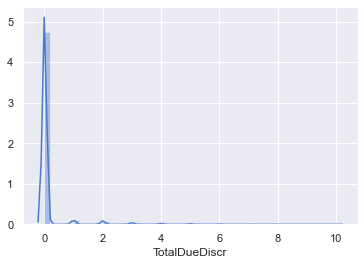

In [ ]:
sns.distplot(data['TotalDueDiscr']);

Como se vê, a distribuição é muito desigual entre as faixas, com grande concentração na primeira.

In [ ]:
# discretizando em quantis usando a função qcut
data['TotalDueDiscr'] = pd.qcut(data['TotalDue'],10)

In [ ]:
data['TotalDueDiscr'].value_counts(sort=False)

0     29858
1       615
2       490
3       240
4       125
5        82
6        41
7         8
8         3
9         2
10        1
Name: TotalDueDiscr, dtype: int64

In [ ]:
# adicionando os labels corretos
data['TotalDueDiscr'] = pd.qcut(data['TotalDue'],10,labels = range(10))
data['TotalDueDiscr'].value_counts(sort=False)

0    3192
1    3355
2    3205
3    2834
4    3728
5    2565
6    3212
7    3081
8    3840
9    2453
Name: TotalDueDiscr, dtype: int64

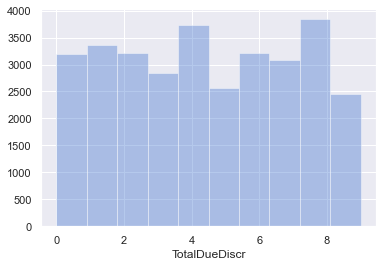

In [ ]:
# plotando o histograma com número de bins fixo e sem a densidade de probabilidade
sns.distplot(data['TotalDueDiscr'],bins=10,kde=False);

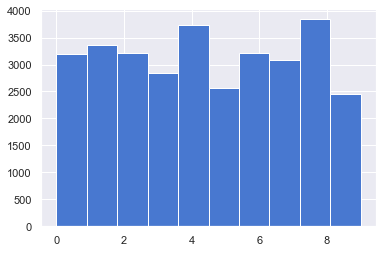

In [ ]:
data['TotalDueDiscr'].hist(bins=10)

# Exercício

Discretize o atributo SalesLastYear em 5 quantis e adicione o novo atributo ao dataframe principal.

In [ ]:
data['SalesLastYearDiscr'] = pd.qcut(data['SalesLastYear'],5,labels = range(5))
data['SalesLastYearDiscr'].value_counts(sort=False)

0    980
1    582
2    879
3    839
4    526
Name: SalesLastYearDiscr, dtype: int64

# Criando atributo qualitativo usando discretização  

A discretização também pode ser usada para derivar atributos qualitativos.

In [32]:

razao = data['SalesLastYear']/data['SalesQuota']
razao.quantile([.25, .5, .75])


0.25    5.834688
0.50    6.481108
0.75    7.988745
dtype: float64

In [33]:
# para analisar a performance dos vendedores dividiremos em quartis a razão entre vendas e cota anual
data['Performance'] = pd.qcut(razao,4,labels=['fraco','médio','bom','ótimo'])

In [34]:
data['Performance'].value_counts()

Performance
fraco    641
bom      489
médio    383
ótimo    340
Name: count, dtype: int64

# Exercício

Crie um atributo qualitativo que indique se o valor da compra (TotalDue) é "alto": último quartil, "baixo": primeiro quartial, ou "médio": segundo e terceiro quartis.

In [35]:
x = pd.qcut(data['TotalDue'],4,labels = range(4))
data['FaixaValor'] = x.map({0:'baixo',1:'médio',2:'médio',3:'alto'})

In [36]:
data['FaixaValor'].value_counts()

FaixaValor
médio    3602
baixo    1972
alto     1286
Name: count, dtype: int64

## Codificação

A recodificação de atributos pode ser necessária antes do uso de certos métodos de análise.

Em particular, duas tansformações são úteis:

Codificação inteira:

- Usa codificação inteira para representar os possíveis valores textuais de uma variável categórica ou ordinal.

Codificação 1-de-n:

- Um atributo binário para cada valor categórico possível de um atributo.



In [37]:
# aqui introduzimos o sklearn, uma biblioteca essencial para a análise de dados
# se o import falhar vá em Manage Packages e instale sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax

In [38]:
# transforma um atributo categórico textual em numérico
label_encoder = LabelEncoder()
encod = label_encoder.fit_transform(data['NomeTerritorioVenda'])
print(label_encoder.classes_,encod)


['Australia' 'Canada' 'Central' 'France' 'Germany' 'Northeast' 'Northwest'
 'Souheast' 'Southeast' 'Southwest' 'United Kingdom'] [ 7  8  1 ...  9 10  4]


In [39]:
#binariza o atributo
onehot_encoder = OneHotEncoder(sparse=False)
encod = encod.reshape(len(encod), 1)
onehot_encoded = onehot_encoder.fit_transform(encod)
print(onehot_encoded[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
# como reverter a binarização em codificação inteira
argmax(onehot_encoded[0:10, :],axis=0)

array([0, 2, 8, 0, 0, 0, 5, 0, 1, 4, 0])

In [41]:
# revertendo a binarização até os valores categóricos originais
revertido = label_encoder.inverse_transform(argmax(onehot_encoded[0:10, :],axis=0))
print(revertido)

['Australia' 'Central' 'Southeast' 'Australia' 'Australia' 'Australia'
 'Northeast' 'Australia' 'Canada' 'Germany' 'Australia']


In [42]:
# transformando as colunas binarizadas em dataframe
territorios = pd.DataFrame(onehot_encoded,columns=label_encoder.classes_)
territorios[0:10]

,Australia,Canada,Central,France,Germany,Northeast,Northwest,Souheast,Southeast,Southwest,United Kingdom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
territorios.describe()

,Australia,Canada,Central,France,Germany,Northeast,Northwest,Souheast,Southeast,Southwest,United Kingdom
count,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000
mean,0.253899,0.103483,0.031628,0.072147,0.065588,0.028130,0.129864,0.000146,0.040519,0.189623,0.084973
std,0.435272,0.304611,0.175020,0.258750,0.247579,0.165356,0.336179,0.012073,0.197187,0.392031,0.278862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# adiciona à base principal
data = pd.concat([data,territorios],axis=1)

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SalesPersonID,1892.0,2.795745e+02,4.295072e+00,274.0000,2.760000e+02,2.790000e+02,2.820000e+02,2.900000e+02
TerritoryID,6861.0,6.028276e+00,2.959752e+00,1.0000,4.000000e+00,6.000000e+00,9.000000e+00,1.000000e+01
SalesQuota,1853.0,2.648138e+05,2.283688e+04,250000.0000,2.500000e+05,2.500000e+05,3.000000e+05,3.000000e+05
Bonus,1892.0,3.646792e+03,1.837955e+03,0.0000,2.500000e+03,3.550000e+03,5.000000e+03,6.700000e+03
CommissionPct,1892.0,1.309831e-02,3.570971e-03,0.0000,1.000000e-02,1.200000e-02,1.500000e-02,2.000000e-02
SalesYTD,1892.0,2.891851e+06,1.005084e+06,519905.9320,2.315186e+06,3.121616e+06,3.763178e+06,4.251369e+06
SalesLastYear,1892.0,1.718625e+06,4.327649e+05,0.0000,1.620277e+06,1.750406e+06,1.997186e+06,2.396540e+06
SubTotal,6860.0,7.910118e+03,1.630701e+04,5.7000,2.049098e+03,2.443350e+03,3.578270e+03,1.508374e+05
TotalDue,6860.0,8.879492e+03,1.839253e+04,6.3484,2.264254e+03,2.699902e+03,3.953988e+03,1.705127e+05
CustomerID,6860.0,2.190632e+04,6.854007e+03,11000.0000,1.503450e+04,2.198350e+04,2.953900e+04,3.011800e+04


# Exercício

Binarize o atributo CountryRegionCode e adicione as colunas geradas ao dataframe principal.

In [46]:
data['CountryRegionCode'].unique()

array(['US', 'CA', 'FR', 'AU', 'GB', 'DE'], dtype=object)

In [47]:
label_encoder = LabelEncoder()
encod = label_encoder.fit_transform(data['CountryRegionCode'])
print(label_encoder.classes_,encod)
onehot_encoder = OneHotEncoder(sparse=False)
encod = encod.reshape(len(encod), 1)
onehot_encoded = onehot_encoder.fit_transform(encod)
print(onehot_encoded[0:10])

['AU' 'CA' 'DE' 'FR' 'GB' 'US'] [5 5 1 ... 5 4 2]
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
paises = pd.DataFrame(onehot_encoded,columns=label_encoder.classes_)
paises[0:10]

,AU,CA,DE,FR,GB,US
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
data = pd.concat([data,paises],axis=1)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SalesPersonID,1892.0,2.795745e+02,4.295072e+00,274.0000,2.760000e+02,2.790000e+02,2.820000e+02,2.900000e+02
TerritoryID,6861.0,6.028276e+00,2.959752e+00,1.0000,4.000000e+00,6.000000e+00,9.000000e+00,1.000000e+01
SalesQuota,1853.0,2.648138e+05,2.283688e+04,250000.0000,2.500000e+05,2.500000e+05,3.000000e+05,3.000000e+05
Bonus,1892.0,3.646792e+03,1.837955e+03,0.0000,2.500000e+03,3.550000e+03,5.000000e+03,6.700000e+03
CommissionPct,1892.0,1.309831e-02,3.570971e-03,0.0000,1.000000e-02,1.200000e-02,1.500000e-02,2.000000e-02
SalesYTD,1892.0,2.891851e+06,1.005084e+06,519905.9320,2.315186e+06,3.121616e+06,3.763178e+06,4.251369e+06
SalesLastYear,1892.0,1.718625e+06,4.327649e+05,0.0000,1.620277e+06,1.750406e+06,1.997186e+06,2.396540e+06
SubTotal,6860.0,7.910118e+03,1.630701e+04,5.7000,2.049098e+03,2.443350e+03,3.578270e+03,1.508374e+05
TotalDue,6860.0,8.879492e+03,1.839253e+04,6.3484,2.264254e+03,2.699902e+03,3.953988e+03,1.705127e+05
CustomerID,6860.0,2.190632e+04,6.854007e+03,11000.0000,1.503450e+04,2.198350e+04,2.953900e+04,3.011800e+04


# Normalização

Define uma escala única para variáveis em diferentes escalas.

z-score: número de desvios padrão

normalize: valores entre 0 e 1:

Normas:

- l1: modifica os valores do conjunto de dados de maneira que em cada lista a soma dos valores normalizados sempre seja igual a 1.

- l2:  modifica os valores do conjunto de dados de maneira que em cada lista a soma dos quadrados sempre seja igual a 1. É também chamado de mínimos quadrados.

- min-max: A normalização mínima e máxima é uma das maneiras mais comuns de normalizar dados. Para cada recurso, o valor mínimo desse recurso é transformado em 0, o valor máximo é transformado em 1 e todos os outros valores são transformados em decimal entre 0 e 1.

In [50]:
from scipy import stats

z = np.abs(stats.zscore(data['TotalDue']))
print(z.min(),z.max(),z)

nan nan 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6856   NaN
6857   NaN
6858   NaN
6859   NaN
6860   NaN
Name: TotalDue, Length: 6861, dtype: float64


<ipython-input-51-830a1b5e681d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Axes: xlabel='TotalDue'>

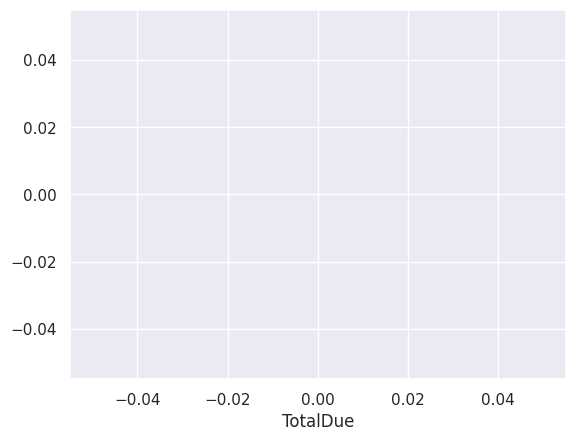

In [51]:
sns.distplot(z)

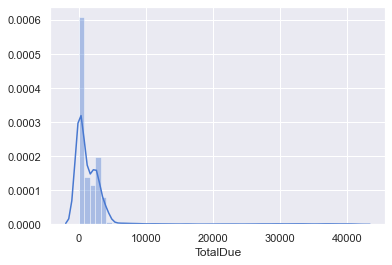

In [ ]:
# usando o z-score para filtrar a porção principal das compras (até 3 desvios padrão)
sns.distplot(data['TotalDue'][z<3])

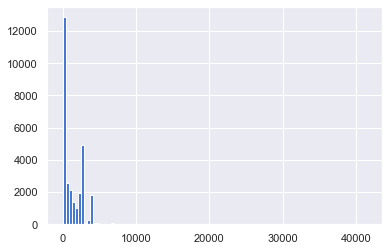

In [ ]:
data['TotalDue'][z<3].hist(bins=100)

In [ ]:
from sklearn import preprocessing
# normaliza um array
# se axis = 1 normaliza cada linha, com axis = 0 normaliza cada coluna
normalizadomax = preprocessing.normalize(data[['SalesQuotaImp','BonusImp','CommissionPctImp','SalesYTDImp','SalesLastYearImp']],axis=0,norm='max')
normalizadol1 = preprocessing.normalize(data[['SalesQuotaImp','BonusImp','CommissionPctImp','SalesYTDImp','SalesLastYearImp']],axis=0,norm='l1')
normalizadol2 = preprocessing.normalize(data[['SalesQuotaImp','BonusImp','CommissionPctImp','SalesYTDImp','SalesLastYearImp']],axis=0,norm='l2')
print(data[['SalesQuotaImp','BonusImp','CommissionPctImp','SalesYTDImp','SalesLastYearImp']][0:10])
print(normalizadomax[0:10])
print(normalizadol1[0:10])
print(normalizadol2[0:10])

   SalesQuotaImp  BonusImp  CommissionPctImp   SalesYTDImp  SalesLastYearImp
0       300000.0    6700.0             0.010  2.315186e+06      1.849641e+06
1       300000.0    6700.0             0.010  2.315186e+06      1.849641e+06
2       250000.0    5000.0             0.015  2.604541e+06      2.038235e+06
3       250000.0    5000.0             0.015  2.604541e+06      2.038235e+06
4       250000.0    2000.0             0.015  4.251369e+06      1.439156e+06
5       250000.0    5000.0             0.010  1.352577e+06      1.927059e+06
6       250000.0    3500.0             0.012  1.573013e+06      1.371635e+06
7       250000.0    2000.0             0.015  4.251369e+06      1.439156e+06
8       250000.0    2500.0             0.015  3.189418e+06      1.997186e+06
9       250000.0    5000.0             0.015  2.604541e+06      2.038235e+06
[[1.         1.         0.5        0.5445742  0.77179648]
 [1.         1.         0.5        0.5445742  0.77179648]
 [0.83333333 0.74626866 0.75       0.

# Exercício

Adicione ao dataframe colunas com todos os valores financeiros normalizados com z-score.

In [ ]:
data[['SalesQuotaImpZ','BonusImpZ','CommissionPctImpZ','SalesYTDImpZ','SalesLastYearImpZ']] = stats.zscore(data[['SalesQuotaImp','BonusImp','CommissionPctImp','SalesYTDImp','SalesLastYearImp']])

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SalesPersonID,3806.0,2.806080e+02,4.846965e+00,274.000000,2.770000e+02,2.790000e+02,2.840000e+02,2.900000e+02
TerritoryID,31465.0,6.090768e+00,2.958119e+00,1.000000,4.000000e+00,6.000000e+00,9.000000e+00,1.000000e+01
SalesQuota,3703.0,2.637591e+05,2.233332e+04,250000.000000,2.500000e+05,2.500000e+05,3.000000e+05,3.000000e+05
Bonus,3806.0,3.505406e+03,1.936290e+03,0.000000,2.000000e+03,3.550000e+03,5.000000e+03,6.700000e+03
CommissionPct,3806.0,1.361534e-02,3.967505e-03,0.000000,1.000000e-02,1.500000e-02,1.500000e-02,2.000000e-02
SalesYTD,3806.0,2.806396e+06,1.042083e+06,172524.451200,1.827067e+06,2.604541e+06,3.763178e+06,4.251369e+06
SalesLastYear,3806.0,1.684203e+06,5.168937e+05,0.000000,1.439156e+06,1.750406e+06,1.997186e+06,2.396540e+06
SubTotal,31465.0,3.491066e+03,1.109345e+04,1.374000,5.697000e+01,7.829900e+02,2.366960e+03,1.639304e+05
TotalDue,31465.0,3.915995e+03,1.251546e+04,1.518300,6.295190e+01,8.652040e+02,2.615491e+03,1.874878e+05
CustomerID,31465.0,2.017018e+04,6.261729e+03,11000.000000,1.443200e+04,1.945200e+04,2.599400e+04,3.011800e+04
